# Import Libraries

In [1]:
!pip install arabic_reshaper

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import arabic_reshaper
from bidi.algorithm import get_display


In [3]:
df1 = pd.read_csv("/kaggle/input/first-try-exam/dataset_first_attempt.csv")
df1.head()

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,23,24,25) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,desk_no,name,school_name_arabic,administration,government_Arabic,branch,Percentage,student_type,status,arabic,...,chemistry,biology,geology,applied_math,physics,total,religion,altarbiat_alwatania,economics_statistics,gender
0,102300.0,احمد محمد احمد محمود ابوالقاسم,مدارس النيل المصريه بنين,أكتوبر,الجيزة,غير محدد,0%,نوعيات أخرى,ناجح,غير مقرر,...,غير مقرر,غير مقرر,غير مقرر,غير مقرر,غير مقرر,0.0,23,20,غير مقرر,M
1,102301.0,احمد محمد عبدالصادق سلامه,مدارس النيل المصريه بنين,أكتوبر,الجيزة,غير محدد,0%,نوعيات أخرى,ناجح,غير مقرر,...,غير مقرر,غير مقرر,غير مقرر,غير مقرر,غير مقرر,0.0,23,23,غير مقرر,M
2,102302.0,ادهم اشرف عبدالهادي معاذ,مدارس النيل المصريه بنين,أكتوبر,الجيزة,غير محدد,0%,نوعيات أخرى,ناجح,غير مقرر,...,غير مقرر,غير مقرر,غير مقرر,غير مقرر,غير مقرر,0.0,17,14,غير مقرر,M
3,102303.0,بيير جون نبيل غالي سعد,مدارس النيل المصريه بنين,أكتوبر,الجيزة,غير محدد,0%,نوعيات أخرى,ناجح,غير مقرر,...,غير مقرر,غير مقرر,غير مقرر,غير مقرر,غير مقرر,0.0,21,22,غير مقرر,M
4,102304.0,رامي محمود عبدالمنعم شحاته,مدارس النيل المصريه بنين,أكتوبر,الجيزة,غير محدد,0%,نوعيات أخرى,ناجح,غير مقرر,...,غير مقرر,غير مقرر,غير مقرر,غير مقرر,غير مقرر,0.0,19,21,غير مقرر,M


In [4]:
df1.shape

(1048575, 27)

In [5]:
df1.columns

Index(['desk_no', 'name', 'school_name_arabic', 'administration',
       'government_Arabic', 'branch', 'Percentage', 'student_type', 'status',
       'arabic', 'first_foreign_lang', 'second_foreign_lang',
       'pure_mathematics', 'history', 'geography', 'philosophy', 'psychology',
       'chemistry', 'biology', 'geology', 'applied_math', 'physics', 'total',
       'religion', 'altarbiat_alwatania', 'economics_statistics', 'gender'],
      dtype='object')

# Clean First Try

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 27 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   desk_no               698196 non-null   float64
 1   name                  698195 non-null   object 
 2   school_name_arabic    698196 non-null   object 
 3   administration        698196 non-null   object 
 4   government_Arabic     698196 non-null   object 
 5   branch                698196 non-null   object 
 6   Percentage            698196 non-null   object 
 7   student_type          698196 non-null   object 
 8   status                698196 non-null   object 
 9   arabic                698196 non-null   object 
 10  first_foreign_lang    698196 non-null   object 
 11  second_foreign_lang   698196 non-null   object 
 12  pure_mathematics      698196 non-null   object 
 13  history               698196 non-null   object 
 14  geography             698196 non-n

In [7]:
df1.isna().sum()

desk_no                 350379
name                    350380
school_name_arabic      350379
administration          350379
government_Arabic       350379
branch                  350379
Percentage              350379
student_type            350379
status                  350379
arabic                  350379
first_foreign_lang      350379
second_foreign_lang     350379
pure_mathematics        350379
history                 350379
geography               350379
philosophy              350379
psychology              350379
chemistry               350379
biology                 350379
geology                 350379
applied_math            350379
physics                 350379
total                   350379
religion                350379
altarbiat_alwatania     350379
economics_statistics    350379
gender                       0
dtype: int64

In [8]:
df1.value_counts(['branch'])

branch    
علمي علوم     325644
أدبي          259147
علمي رياضة     97616
غير محدد       15789
dtype: int64

In [9]:
df1[df1['branch']=="غير محدد"]

,desk_no,name,school_name_arabic,administration,government_Arabic,branch,Percentage,student_type,status,arabic,...,chemistry,biology,geology,applied_math,physics,total,religion,altarbiat_alwatania,economics_statistics,gender
0,102300.0,احمد محمد احمد محمود ابوالقاسم,مدارس النيل المصريه بنين,أكتوبر,الجيزة,غير محدد,0%,نوعيات أخرى,ناجح,غير مقرر,...,غير مقرر,غير مقرر,غير مقرر,غير مقرر,غير مقرر,0.0,23,20,غير مقرر,M
1,102301.0,احمد محمد عبدالصادق سلامه,مدارس النيل المصريه بنين,أكتوبر,الجيزة,غير محدد,0%,نوعيات أخرى,ناجح,غير مقرر,...,غير مقرر,غير مقرر,غير مقرر,غير مقرر,غير مقرر,0.0,23,23,غير مقرر,M
2,102302.0,ادهم اشرف عبدالهادي معاذ,مدارس النيل المصريه بنين,أكتوبر,الجيزة,غير محدد,0%,نوعيات أخرى,ناجح,غير مقرر,...,غير مقرر,غير مقرر,غير مقرر,غير مقرر,غير مقرر,0.0,17,14,غير مقرر,M
3,102303.0,بيير جون نبيل غالي سعد,مدارس النيل المصريه بنين,أكتوبر,الجيزة,غير محدد,0%,نوعيات أخرى,ناجح,غير مقرر,...,غير مقرر,غير مقرر,غير مقرر,غير مقرر,غير مقرر,0.0,21,22,غير مقرر,M
4,102304.0,رامي محمود عبدالمنعم شحاته,مدارس النيل المصريه بنين,أكتوبر,الجيزة,غير محدد,0%,نوعيات أخرى,ناجح,غير مقرر,...,غير مقرر,غير مقرر,غير مقرر,غير مقرر,غير مقرر,0.0,19,21,غير مقرر,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
647055,880700.0,وعد اسامة احمد عثمان,ايليت سكولزالدوليه قسم امريكى,سوهاج,سوهاج,غير محدد,24.15%,نوعيات أخرى,ناجح,41,...,غير مقرر,غير مقرر,غير مقرر,غير مقرر,غير مقرر,99.0,19,19,غير مقرر,M
647056,880701.0,محمد فوزى محفوظ خلاف,جيل المستقبل الدولية ث,اخميم,سوهاج,غير محدد,24.15%,نوعيات أخرى,دور ثاني,31,...,غير مقرر,غير مقرر,غير مقرر,غير مقرر,غير مقرر,99.0,إجتياز,إجتياز,غير مقرر,M
647057,880702.0,عبدالرحمن محمد ابوالمجد سالم,جيل المستقبل الدولية ث,اخميم,سوهاج,غير محدد,24.15%,نوعيات أخرى,دور ثاني,40,...,غير مقرر,غير مقرر,غير مقرر,غير مقرر,غير مقرر,99.0,إجتياز,إجتياز,غير مقرر,M
647058,880703.0,جولى اشرف سناده حنين,جيل المستقبل الدولية ث,اخميم,سوهاج,غير محدد,24.15%,نوعيات أخرى,دور ثاني,40,...,غير مقرر,غير مقرر,غير مقرر,غير مقرر,غير مقرر,99.0,إجتياز,إجتياز,غير مقرر,F


In [10]:
df1.value_counts(['student_type'])

student_type
طلاب            682358
نوعيات أخرى      15838
dtype: int64

># We can Remove student_type نوعيات أخرى as We don't use them we only deal with Thanawya amaa for(ادبي -علمي رياضه -علمي علوم)

In [11]:
df1.drop(df1[df1['branch'] == 'غير محدد'].index, axis=0, inplace=True)
df1.drop(df1[df1['student_type'] == 'نوعيات أخرى'].index, axis=0, inplace=True)

In [12]:
df1 = df1.dropna(axis = 0)
df1.isna().sum()

desk_no                 0
name                    0
school_name_arabic      0
administration          0
government_Arabic       0
branch                  0
Percentage              0
student_type            0
status                  0
arabic                  0
first_foreign_lang      0
second_foreign_lang     0
pure_mathematics        0
history                 0
geography               0
philosophy              0
psychology              0
chemistry               0
biology                 0
geology                 0
applied_math            0
physics                 0
total                   0
religion                0
altarbiat_alwatania     0
economics_statistics    0
gender                  0
dtype: int64

># student type column is not helpful to us so if we remove it it will be bad 

In [13]:
df1 = df1.drop(['student_type'],axis = 1)
df1.columns

Index(['desk_no', 'name', 'school_name_arabic', 'administration',
       'government_Arabic', 'branch', 'Percentage', 'status', 'arabic',
       'first_foreign_lang', 'second_foreign_lang', 'pure_mathematics',
       'history', 'geography', 'philosophy', 'psychology', 'chemistry',
       'biology', 'geology', 'applied_math', 'physics', 'total', 'religion',
       'altarbiat_alwatania', 'economics_statistics', 'gender'],
      dtype='object')

In [14]:
df1.value_counts(['status'])

status  
ناجح        450945
دور ثاني    154939
راسب         76463
dtype: int64

># We Have Three Category  دور تاني - راسب- ناجح

In [15]:
df1['status'] = df1['status'].replace({'راسب':0,'دور ثاني':-1,'ناجح':1})

In [16]:
df1.value_counts(['status'])

status
 1        450945
-1        154939
 0         76463
dtype: int64

In [17]:
df1['branch'] = df1['branch'].astype('category')
df1['status'] = df1['status'].astype('category')


In [18]:
df1['Percentage'] = df1['Percentage'].replace(r'%',value = " ",regex=True).astype('float')
#df1['Percentage'].astype('float')

In [19]:
df1['Percentage']

3022      87.80
3024      57.32
3025      83.41
3026      53.17
3027      51.46
          ...  
698192    54.15
698193    62.93
698194    70.98
698195    85.49
698196    69.27
Name: Percentage, Length: 682347, dtype: float64

In [20]:
df1.value_counts(['administration'])

administration
المنتزه           14877
شرق الاسكندريه    10941
العمرانية         10325
المنيا             9457
وسط الاسكندريه     7480
                  ...  
أبورديس              39
مرسى علم             31
شلاتيــن             26
نخـــل               22
سانت كاتريـــن       19
Length: 287, dtype: int64

># We have 287 administration in all the Government 

In [21]:
Government_Names = df1.value_counts(['government_Arabic'])
Government_Names,len(Government_Names)

(government_Arabic
 القاهرة              102445
 الجيزة                79598
 الشرقية               49496
 الدقهلية              47777
 الاسكندرية            47219
 القليوبية             42734
 المنيا                38253
 الغربية               35393
 المنوفية              33989
 البحيرة               33129
 اسيوط                 25947
 كفر الشيخ             21273
 سوهاج                 20990
 بني سويف              17821
 الفيوم                16460
 قنا                   16092
 دمياط                 11640
 الإسماعيلية            9269
 اسوان                  6950
 الاقصر                 6655
 بورسعيد                4715
 السويس                 3930
 شمال سيناء             3170
 البحر الأحمر           2571
 مطروح                  2192
 الوادي الجديد          1784
 جنوب سيناء              855
 dtype: int64,
 27)

># We have 27 Government

# Add Gender To first try dataframe

In [22]:
dfGender  = pd.read_csv('/kaggle/input/first-try-exam/01_firstExam_data_arabic_extra_gender_feature_v1 (1).csv')
dfGender.head()

,desk_no,name,school_name_arabic,administration,government_Arabic,branch,Percentage,student_type,status,arabic,...,chemistry,biology,geology,applied_math,physics,total,religion,altarbiat_alwatania,economics_statistics,gender
0,102300.0,احمد محمد احمد محمود ابوالقاسم,مدارس النيل المصريه بنين,أكتوبر,الجيزة,غير محدد,0%,نوعيات أخرى,ناجح,غير مقرر,...,غير مقرر,غير مقرر,غير مقرر,غير مقرر,غير مقرر,0.0,23,20,غير مقرر,M
1,102301.0,احمد محمد عبدالصادق سلامه,مدارس النيل المصريه بنين,أكتوبر,الجيزة,غير محدد,0%,نوعيات أخرى,ناجح,غير مقرر,...,غير مقرر,غير مقرر,غير مقرر,غير مقرر,غير مقرر,0.0,23,23,غير مقرر,M
2,102302.0,ادهم اشرف عبدالهادي معاذ,مدارس النيل المصريه بنين,أكتوبر,الجيزة,غير محدد,0%,نوعيات أخرى,ناجح,غير مقرر,...,غير مقرر,غير مقرر,غير مقرر,غير مقرر,غير مقرر,0.0,17,14,غير مقرر,M
3,102303.0,بيير جون نبيل غالي سعد,مدارس النيل المصريه بنين,أكتوبر,الجيزة,غير محدد,0%,نوعيات أخرى,ناجح,غير مقرر,...,غير مقرر,غير مقرر,غير مقرر,غير مقرر,غير مقرر,0.0,21,22,غير مقرر,M
4,102304.0,رامي محمود عبدالمنعم شحاته,مدارس النيل المصريه بنين,أكتوبر,الجيزة,غير محدد,0%,نوعيات أخرى,ناجح,غير مقرر,...,غير مقرر,غير مقرر,غير مقرر,غير مقرر,غير مقرر,0.0,19,21,غير مقرر,M


In [23]:
df1 = df1.drop(['gender'],axis=1)
df1.head()

,desk_no,name,school_name_arabic,administration,government_Arabic,branch,Percentage,status,arabic,first_foreign_lang,...,psychology,chemistry,biology,geology,applied_math,physics,total,religion,altarbiat_alwatania,economics_statistics
3022,105410.0,احمد محمد احمد محمد,الاورمان الرسمية لغات بنين,الدقى,الجيزة,أدبي,87.80,1,61,27,...,60,غير مقرر,غير مقرر,غير مقرر,غير مقرر,غير مقرر,360.0,17,25,37
3024,105412.0,مريهان رمضان نجم الدين محمد,جمال عبد الناصرالرسمية لغات بنات,الدقى,الجيزة,علمي علوم,57.32,1,47,25,...,غير مقرر,30,30,44,غير مقرر,33,235.0,18,20,27
3025,105413.0,ابانوب خالد مرتجي يسي,هضبة الاهرام ث التجريبية لغات بنين,الهرم,الجيزة,أدبي,83.41,1,70,38,...,54,غير مقرر,غير مقرر,غير مقرر,غير مقرر,غير مقرر,342.0,25,25,35
3026,105415.0,محمود صابر علي علي خالد,التحرير الرسمية لغات بنين,أكتوبر,الجيزة,أدبي,53.17,1,57,27,...,30,غير مقرر,غير مقرر,غير مقرر,غير مقرر,غير مقرر,218.0,20,17.5,27
3027,105416.0,حاتم عصام محمد عمادالدين عبدالحميد,التحرير الرسمية لغات بنين,أكتوبر,الجيزة,علمي رياضة,51.46,-1,56,25,...,غير مقرر,30,غير مقرر,غير مقرر,33,31,211.0,18,20,31


In [24]:
FirstTry = pd.merge(df1,dfGender[['desk_no', 'gender']],on = 'desk_no',how = 'left')

In [25]:
FirstTry.sample(10)

,desk_no,name,school_name_arabic,administration,government_Arabic,branch,Percentage,status,arabic,first_foreign_lang,...,chemistry,biology,geology,applied_math,physics,total,religion,altarbiat_alwatania,economics_statistics,gender
247947,400191.0,منه الله محمد سعيد محمد,البطل الشهيد رقيب شرطة/عماد الدين عبد العزيز,المرج,القاهرة,أدبي,74.88,1,60,37,...,غير مقرر,غير مقرر,غير مقرر,غير مقرر,غير مقرر,307.0,19,20,28,F
68386,175311.0,عبدالله خليفه سالم بسيس,خدمات الشهيد احمد عبد العاطى ث بنين,سنورس,الفيوم,أدبي,47.80,-1,40,14,...,غير مقرر,غير مقرر,غير مقرر,غير مقرر,غير مقرر,196.0,14,16,25,M
286901,439989.0,بسمة صلاح احمد محمد,المجمع التعليمى ثانوى عربى,شمال الاسماعيلية,الإسماعيلية,علمي علوم,78.29,1,61,34,...,49,52,57,غير مقرر,33,321.0,16,20,35,F
105057,230646.0,يوسف محمود رمضان محمد,المبتديان الثانوية الخاصة المشتركة,السيدة زينب,القاهرة,أدبي,32.93,0,29,15,...,غير مقرر,غير مقرر,غير مقرر,غير مقرر,غير مقرر,135.0,14,13,14,M
488604,696285.0,محمد محمود محمد مسعد ابراهيم,الشهيدعودة ث بنين,شربين,الدقهلية,علمي علوم,76.59,1,66,35,...,45,42,53,غير مقرر,41,314.0,20,16,29,M
478355,686007.0,عبد الرحمن محمد عبد الرحمن احمد عبد السلام,النقيب اشرف ابراهيم محمد ابراهيم جاد,شرق المنصورة,الدقهلية,علمي علوم,87.07,1,65,44,...,58,49,56,غير مقرر,48,357.0,24,19,37,M
429232,618258.0,احمد عبد الناصر عبد الحميد عويس,طلعت حرب الثانوية العسكرية,غرب المحلة,الغربية,علمي رياضة,82.93,1,64,47,...,40,غير مقرر,غير مقرر,47,55,340.0,17,20,28,M
655912,907764.0,دينا حمادة فوزى امين,المحاسنة الثانوية المشتركة,جرجا,سوهاج,أدبي,41.22,0,29,25,...,غير مقرر,غير مقرر,غير مقرر,غير مقرر,غير مقرر,169.0,18,14,25,F
316888,479493.0,محمود أحمد حسنى على حمزه,ش/ محمد هاني لاشين الثانوية,كفر الزيات,الغربية,علمي علوم,81.71,1,58,43,...,40,48,55,غير مقرر,52,335.0,20,23,41,M
8389,114204.0,عمر شاذلي عمران زوام,الاورمان ث بنين,الدقى,الجيزة,أدبي,70.00,1,54,36,...,غير مقرر,غير مقرر,غير مقرر,غير مقرر,غير مقرر,287.0,21,18,32,M


In [26]:
FirstTry.isna().sum()

desk_no                 0
name                    0
school_name_arabic      0
administration          0
government_Arabic       0
branch                  0
Percentage              0
status                  0
arabic                  0
first_foreign_lang      0
second_foreign_lang     0
pure_mathematics        0
history                 0
geography               0
philosophy              0
psychology              0
chemistry               0
biology                 0
geology                 0
applied_math            0
physics                 0
total                   0
religion                0
altarbiat_alwatania     0
economics_statistics    0
gender                  3
dtype: int64

In [27]:
FirstTry[FirstTry['gender'].isna()]

,desk_no,name,school_name_arabic,administration,government_Arabic,branch,Percentage,status,arabic,first_foreign_lang,...,chemistry,biology,geology,applied_math,physics,total,religion,altarbiat_alwatania,economics_statistics,gender
345741,510262.0,روكسان شريف الشحات عبدالونيس صقر,الرياض الرسمية للغات الثانوية,الرياض,كفر الشيخ,علمي علوم,86.83,1,68,47,...,53,45,55,غير مقرر,48,356.0,23,21,25,NaN
587607,827312.0,نجاه رضا عبدالرحيم محمد,منازل ابناؤنا فى الخارج إدارة ملوى,ملوى,المنيا,أدبي,67.56,1,59,36,...,غير مقرر,غير مقرر,غير مقرر,غير مقرر,غير مقرر,277.0,16,20,28,NaN
623160,864755.0,شنوده شحاته رسمى جاد الله,منازل ابناؤنا فى الخارج إدارة دير مواس,دير مواس,المنيا,أدبي,44.15,0,21,38,...,غير مقرر,غير مقرر,غير مقرر,غير مقرر,غير مقرر,181.0,إجتياز,إجتياز,إجتياز,NaN


In [28]:
additional_Names = {
    'روكسان':'M',
     "نجاه":'F',
    "شنوده":"M"
                   }

In [29]:
for name,value in additional_Names.items():
    FirstTry['gender'] =  FirstTry['gender'].fillna(value)
    


In [30]:
FirstTry['gender'].isna().sum()

0

In [31]:
FirstTry[FirstTry['desk_no']==510262.0]

,desk_no,name,school_name_arabic,administration,government_Arabic,branch,Percentage,status,arabic,first_foreign_lang,...,chemistry,biology,geology,applied_math,physics,total,religion,altarbiat_alwatania,economics_statistics,gender
345741,510262.0,روكسان شريف الشحات عبدالونيس صقر,الرياض الرسمية للغات الثانوية,الرياض,كفر الشيخ,علمي علوم,86.83,1,68,47,...,53,45,55,غير مقرر,48,356.0,23,21,25,M


# Working On cleaning Second Exam

In [32]:
second = pd.read_csv('/kaggle/input/second-try/dataset_second_attempt.csv')
second.head()

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,23,24,25) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,desk_no,name,school_name_arabic,administration,government_Arabic,branch,Percentage,student_type,status,arabic,...,chemistry,biology,geology,applied_math,physics,total,religion,altarbiat_alwatania,economics_statistics,gender
0,102353.0,اسماعيل احمد خلف محمد الحسيني,الالمانية الانجيلية خ بنين (ابيتور),الدقى,الجيزة,غير محدد,9.76%,نوعيات أخرى,ناجح,40,...,غير مقرر,غير مقرر,غير مقرر,غير مقرر,غير مقرر,40.0,16,16,غير مقرر,M
1,102361.0,حسن خالد عبدالفتاح جوهري,الالمانية الانجيلية خ بنين (ابيتور),الدقى,الجيزة,غير محدد,9.76%,نوعيات أخرى,ناجح,40,...,غير مقرر,غير مقرر,غير مقرر,غير مقرر,غير مقرر,40.0,21,18,غير مقرر,M
2,102367.0,سامي احمد سامي محمد بدوي,الالمانية الانجيلية خ بنين (ابيتور),الدقى,الجيزة,غير محدد,0.00%,نوعيات أخرى,راسب,غائب,...,غير مقرر,غير مقرر,غير مقرر,غير مقرر,غير مقرر,0.0,20,18,غير مقرر,M
3,102390.0,تايا نادر رؤوف الهامي,الالمانية الانجيلية خ بنات (ابيتور),الدقى,الجيزة,غير محدد,9.76%,نوعيات أخرى,ناجح,40,...,غير مقرر,غير مقرر,غير مقرر,غير مقرر,غير مقرر,40.0,13,19,غير مقرر,F
4,102405.0,فريده ناير علوي فؤاد,الالمانية الانجيلية خ بنات (ابيتور),الدقى,الجيزة,غير محدد,9.76%,نوعيات أخرى,ناجح,40,...,غير مقرر,غير مقرر,غير مقرر,غير مقرر,غير مقرر,40.0,13,13,غير مقرر,F


In [33]:
second.value_counts(['branch'])

branch    
أدبي          72909
علمي علوم     63769
علمي رياضة    17171
غير محدد       1680
dtype: int64

In [34]:
second.drop(second[second['branch'] == 'غير محدد'].index, axis=0, inplace=True)
second.drop(second[second['student_type'] == 'نوعيات أخرى'].index, axis=0, inplace=True)

In [35]:
second.shape

(1046879, 27)

In [36]:
second.isna().sum()

desk_no                 893046
name                    893046
school_name_arabic      893046
administration          893046
government_Arabic       893046
branch                  893046
Percentage              893046
student_type            893046
status                  893046
arabic                  893046
first_foreign_lang      893046
second_foreign_lang     893046
pure_mathematics        893046
history                 893046
geography               893046
philosophy              893046
psychology              893046
chemistry               893046
biology                 893046
geology                 893046
applied_math            893046
physics                 893046
total                   893046
religion                893046
altarbiat_alwatania     893046
economics_statistics    893046
gender                       0
dtype: int64

In [37]:
secondTry = second.dropna(axis = 0)


In [38]:
secondTry['Percentage'] = secondTry['Percentage'].replace(r'%',value = " ",regex=True).astype('float')
secondTry['Percentage']

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


400       54.88
401       74.88
402       45.73
403       55.85
404       62.93
          ...  
155524    47.80
155525    58.41
155526    60.85
155527    58.05
155528    65.85
Name: Percentage, Length: 153833, dtype: float64

In [39]:
secondTry.columns

Index(['desk_no', 'name', 'school_name_arabic', 'administration',
       'government_Arabic', 'branch', 'Percentage', 'student_type', 'status',
       'arabic', 'first_foreign_lang', 'second_foreign_lang',
       'pure_mathematics', 'history', 'geography', 'philosophy', 'psychology',
       'chemistry', 'biology', 'geology', 'applied_math', 'physics', 'total',
       'religion', 'altarbiat_alwatania', 'economics_statistics', 'gender'],
      dtype='object')

In [40]:
secondTry = secondTry.drop(['student_type'],axis=1)
secondTry.columns


Index(['desk_no', 'name', 'school_name_arabic', 'administration',
       'government_Arabic', 'branch', 'Percentage', 'status', 'arabic',
       'first_foreign_lang', 'second_foreign_lang', 'pure_mathematics',
       'history', 'geography', 'philosophy', 'psychology', 'chemistry',
       'biology', 'geology', 'applied_math', 'physics', 'total', 'religion',
       'altarbiat_alwatania', 'economics_statistics', 'gender'],
      dtype='object')

In [41]:
secondTry['branch'] = secondTry['branch'].astype('category')
secondTry['status'] = secondTry['status'].astype('category')
secondTry['status'] = secondTry['status'].replace({'راسب':0,'دور ثاني':-1,'ناجح':1})

In [42]:
secondTry['status']

400       1
401       1
402       1
403       1
404       1
         ..
155524    0
155525    1
155526    1
155527    1
155528    1
Name: status, Length: 153833, dtype: int64

In [43]:
secondTry.drop('gender', axis=1, inplace=True,)



In [44]:
secondwithGender = pd.merge(secondTry,dfGender[['desk_no', 'gender']],on = 'desk_no',how = 'left')
secondwithGender

,desk_no,name,school_name_arabic,administration,government_Arabic,branch,Percentage,status,arabic,first_foreign_lang,...,chemistry,biology,geology,applied_math,physics,total,religion,altarbiat_alwatania,economics_statistics,gender
0,105416.0,حاتم عصام محمد عمادالدين عبدالحميد,التحرير الرسمية لغات بنين,أكتوبر,الجيزة,علمي رياضة,54.88,1,56,25,...,30,غير مقرر,غير مقرر,33,31,225.0,18,20,31,M
1,105463.0,دنيا محمد فوزي عبدالله,العجوزة ث بنات,العجوزة,الجيزة,أدبي,74.88,1,76,26,...,غير مقرر,غير مقرر,غير مقرر,غير مقرر,غير مقرر,307.0,16,12.5,28.5,F
2,105477.0,ندي محمد مصطفي حسين,د/محمود عمر ث بنات,الهرم,الجيزة,أدبي,45.73,1,40,25.5,...,غير مقرر,غير مقرر,غير مقرر,غير مقرر,غير مقرر,187.5,16,12.5,33,F
3,105478.0,عمر حسين محمود ابراهيم محمود,6 اكتوبر الحى السادس ث بنين,أكتوبر,الجيزة,أدبي,55.85,1,42,33,...,غير مقرر,غير مقرر,غير مقرر,غير مقرر,غير مقرر,229.0,21,12.5,25,M
4,105485.0,ابراهيم جمال السيد احمد هريدي,6 اكتوبر الحى السادس ث بنين,أكتوبر,الجيزة,علمي علوم,62.93,1,73,44,...,31,30,30,غير مقرر,30,258.0,18,25,28,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153828,937400.0,محمد رفعت محمد فراج,منازل إدارة جهينة,جهينة,سوهاج,علمي علوم,47.80,0,غائب,37,...,30,37,56,غير مقرر,36,196.0,إجتياز,إجتياز,إجتياز,M
153829,937403.0,اسراء عبدالراضى محمد عبدالرحيم,منازل إدارة جهينة,جهينة,سوهاج,علمي علوم,58.41,1,53.5,29,...,30,30,34,غير مقرر,30,239.5,إجتياز,إجتياز,إجتياز,F
153830,937404.0,هدير ماهر كامل محمد,منازل إدارة جهينة,جهينة,سوهاج,أدبي,60.85,1,40.5,38,...,غير مقرر,غير مقرر,غير مقرر,غير مقرر,غير مقرر,249.5,إجتياز,إجتياز,إجتياز,F
153831,937408.0,خلود حسن عبد الستار محمد,منازل إدارة جهينة,جهينة,سوهاج,أدبي,58.05,1,40,39,...,غير مقرر,غير مقرر,غير مقرر,غير مقرر,غير مقرر,238.0,إجتياز,إجتياز,إجتياز,F


In [45]:
secondwithGender['gender'].isna().sum()

784

# merge first Exam and Second Exam

In [46]:
df = pd.merge(FirstTry,secondwithGender, how='outer', on=['desk_no', 'name', 'school_name_arabic', 'administration','branch', 'gender','government_Arabic'],suffixes=(None,'_2nd'), indicator=True)

In [47]:
df.shape

(683286, 46)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683286 entries, 0 to 683285
Data columns (total 46 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   desk_no                   683286 non-null  float64 
 1   name                      683286 non-null  object  
 2   school_name_arabic        683286 non-null  object  
 3   administration            683286 non-null  object  
 4   government_Arabic         683286 non-null  object  
 5   branch                    683286 non-null  category
 6   Percentage                682347 non-null  float64 
 7   status                    682347 non-null  category
 8   arabic                    682347 non-null  object  
 9   first_foreign_lang        682347 non-null  object  
 10  second_foreign_lang       682347 non-null  object  
 11  pure_mathematics          682347 non-null  object  
 12  history                   682347 non-null  object  
 13  geography                 682

In [49]:
from tqdm import tqdm

for i in tqdm(range(8, 25)):
    df.iloc[:,i]= df.iloc[:,i].apply(pd.to_numeric, errors='coerce')
for i in tqdm(range(8, 25)):
    df.iloc[:,i]= df.iloc[:,i].astype('float32')

100%|██████████| 17/17 [00:00<00:00, 361.86it/s]


In [50]:
from tqdm import tqdm

for i in tqdm(range(28, 44)):
    df.iloc[:,i]= df.iloc[:,i].apply(pd.to_numeric, errors='coerce')
for i in tqdm(range(28, 44)):
    df.iloc[:,i]= df.iloc[:,i].astype('float32')

100%|██████████| 16/16 [00:00<00:00, 409.58it/s]


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683286 entries, 0 to 683285
Data columns (total 46 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   desk_no                   683286 non-null  float64 
 1   name                      683286 non-null  object  
 2   school_name_arabic        683286 non-null  object  
 3   administration            683286 non-null  object  
 4   government_Arabic         683286 non-null  object  
 5   branch                    683286 non-null  category
 6   Percentage                682347 non-null  float64 
 7   status                    682347 non-null  category
 8   arabic                    678555 non-null  float32 
 9   first_foreign_lang        677238 non-null  float32 
 10  second_foreign_lang       676657 non-null  float32 
 11  pure_mathematics          96729 non-null   float32 
 12  history                   258155 non-null  float32 
 13  geography                 258

In [52]:
df.rename(columns = {'school_name_arabic':'school_name', 'government_Arabic':'city',"administration":'subCity','altarbiat_alwatania':'national_education',"altarbiat_alwatania_2nd":'national_education_2nd'}, inplace = True)


# How many branches We have and each branch number of student ?

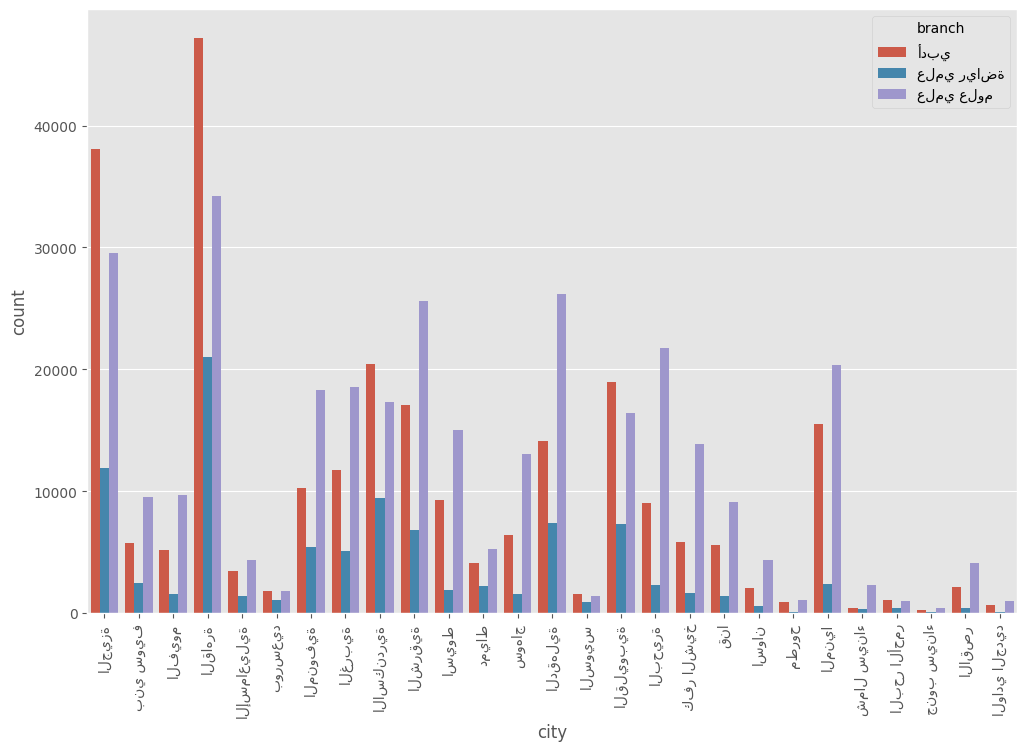

In [53]:
plt.figure(figsize=(12,8),dpi=100)
sns.countplot(data =df,x = 'city',hue ='branch')
plt.xticks(rotation=90)
plt.show()

#city_name = []
for i in df['city']:
    reshaped_text = arabic_reshaper.reshape(i)
    #bidi_text = get_display(reshaped_text)
    city_name.append(get_display(reshaped_text))
df['citym'] = city_name
plt.figure(figsize=(12,8),dpi=100)
sns.countplot(data =df,x = 'citym',hue ='branch')
plt.xticks(rotation=90)
plt.show()